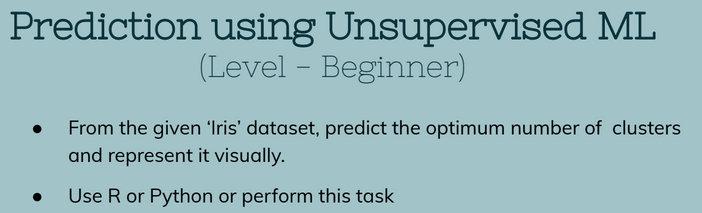

#### AUTHOR - Sruthi Sudheer

##### Importing initially required libraries

In [1]:
import pandas as pd
import numpy as np

##### Reading Data

In [2]:
dataPath='D:\SparksInternship\Iris.csv' # path of the file in my system
df=pd.read_csv(dataPath)

##### Displaying the first five rows of the data

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dropping the column 'Id' to avoid confusion of serial index.

In [4]:
df.drop(['Id'],axis=1,inplace=True)

In [5]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


So, there are a total of four predictor features available in the dataset with a column 'Species' indicating the category. 

##### Number of (Rows,Columns) in the dataframe

In [6]:
df.shape

(150, 5)

The dataframe has 150 rows and 5 columns.

##### Column data types

In [7]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

The predictor variables are all continuous in nature.

##### Data Cleaning

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(147, 5)

There are no missing values in the dataset.

There were 3 duplicate/redundant rows which are nor=w removed from the dataframe.

> ##### Univariate Analysis

##### Descriptive Statistical summary of the continuous features

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The mean, standard deviation, max, min values of the columns can be seen in the above result.

#### Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

Since, the machine cannot interpret features that are strings(object dtype); label encoding is to be done.

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### Importing library for data visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

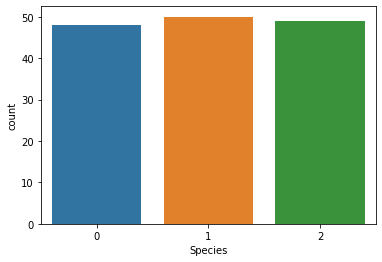

In [16]:
sns.countplot(df['Species'])

There are three output categories.

In [17]:
df['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

> ##### Multivariate Analysis

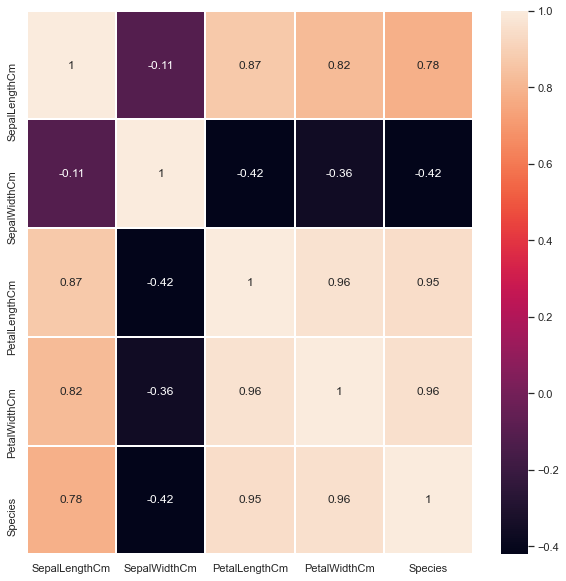

In [18]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(),linewidths=1,annot=True)

Based on the heatmap above, it can be inferred that the category 'Species' is more dependent on the predictor variables of 'PetalLengthCm' and 'PetalWidthCm' (due to high postive correlation of 0.95,0.96).

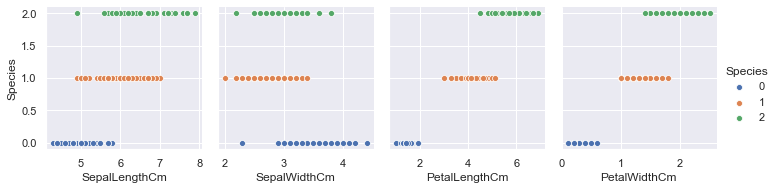

In [19]:
sns.pairplot(data=df,y_vars=['Species'],x_vars=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],hue='Species')

The pairplot above helps in understanding how the categories (of 'Species') is changing with respect to the predictor variables.

Considering all the four predictor variables for learning:

##### Taking the predictor variables.

In [20]:
x_df=df.drop('Species',axis=1)
actual=df['Species']

#### K-Means algorithm

In [21]:
from sklearn.cluster import KMeans


In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
print(wcss)

[760.8884353741496, 178.27163265306112, 86.0105759803922, 66.33240377730043, 49.70517735355013, 42.341501322751355, 35.57251069572288, 31.13395542903153, 28.99760625784893, 26.886243823986486]


##### Finding the optimum number of clusters

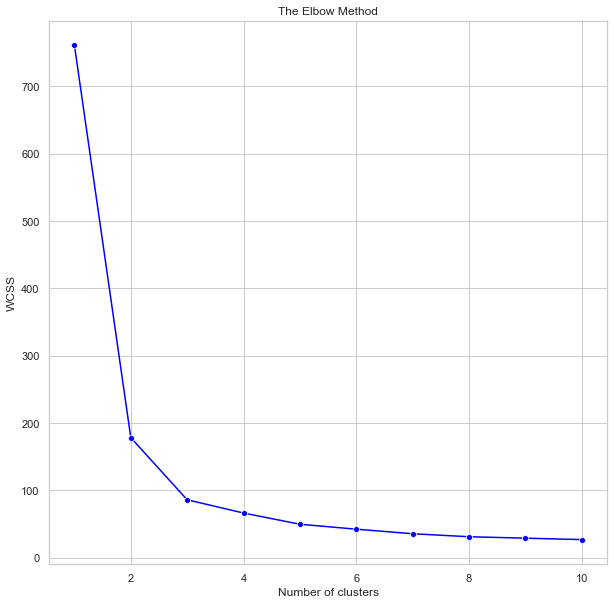

In [23]:
sns.set(style='whitegrid')
sns.lineplot(range(1, 11),wcss,marker='o',color='blue')
sns.set(rc={'figure.figsize':(5,5)})
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum value for K would be 3 as per the Elbow graph obtained above. 
With an increase in the number of clusters, the WCSS values are decreasing. 
After 3 the drop in wcss is also minimal.

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_preds = kmeans.fit_predict(x_df)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

##### Visualizing the clusters

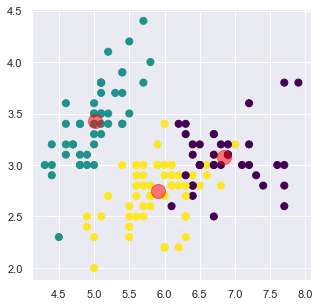

In [25]:
plt.scatter(x_df.iloc[:, 0], x_df.iloc[:, 1], c=y_preds, s=50, cmap='viridis')
sns.set(rc={'figure.figsize':(9,10)})
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [26]:
from sklearn import metrics
metrics.adjusted_rand_score(y_preds, actual)

0.7365165921513978

The Adjusted Rand index is bounded between -1 and 1. Closer to 1 is good, while closer to -1 is bad.
The obtained value is closer to 1, suggesting that the clustering done based on the model is good.

Considering only the features 'PetalLengthCm' and'PetalWidthCm' which showed high correlation with 'Species'.

In [27]:
x_df2=df.drop(['Species','SepalLengthCm','SepalWidthCm'],axis=1)

In [28]:
y_preds2 = kmeans.fit_predict(x_df2)
y_preds2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
metrics.adjusted_rand_score(y_preds2, actual)

0.8822525865052165

The obtained value, now is relatively more close to 1, suggesting that the clustering done based on the model(after retaining required features) is better.